# TASK 0:  Basic neural network model

# In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


#The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

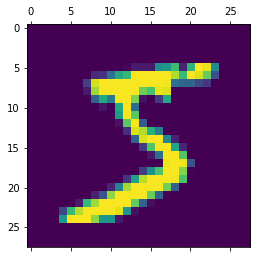

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

# to convert the 2-D matrix into a 1-D array

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4865 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3056 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2854 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2746 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9263


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.9265


[0.2660278081893921, 0.9265000224113464]

#the above network is without hidden layer which is giving the loss value= 0.26 and accuracy of 92.6%

# Task :1  Here we have to update some of the  hyper-parameters of the network such as Batch Size,Hidden Layer,Learning Rate .

 in this model we consider learning rate as 0.01, Batch size =128 and hidden layer=1.

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
Batch Gradient Descent. Batch Size = Size of Training Set
Stochastic Gradient Descent. Batch Size = 1
Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set

We are using Mini-batch Gradient Descent

Epoch: The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train,batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2498 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1198 - accuracy: 0.9654
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0939 - accuracy: 0.9709
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0787 - accuracy: 0.9761
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0745 - accuracy: 0.9769


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9725


[0.10755477100610733, 0.9725000262260437]

By Using learning rate as 0.01, Batch size =128 and hidden layer=1 we got an accuracy of 96.4% 

# let Train again with parameter learning rate as 0.1, Batch size =32 and hidden layer=2.

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train,batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 6.6861 - accuracy: 0.0988
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.6876 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.6876 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.6876 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 6.6876 - accuracy: 0.0987


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.7620 - accuracy: 0.0980


[6.761998653411865, 0.09799999743700027]

As we can see by increasing the learning rate 10 times the previous value the accuracy of the model get 10% only

# train model with parameter learning rate as 0.05, Batch size =16 and hidden layer=4.

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, input_shape=(784,), activation='relu'),
    keras.layers.Dense(30, input_shape=(784,), activation='relu'),
    keras.layers.Dense(20, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train,batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 10s 3ms/step - loss: 3.7735 - accuracy: 0.0994
Epoch 2/5
3750/3750 [==============================] - 9s 2ms/step - loss: 3.7954 - accuracy: 0.0987
Epoch 3/5
3750/3750 [==============================] - 9s 2ms/step - loss: 3.7954 - accuracy: 0.0987
Epoch 4/5
3750/3750 [==============================] - 9s 2ms/step - loss: 3.7954 - accuracy: 0.0987
Epoch 5/5
3750/3750 [==============================] - 9s 2ms/step - loss: 3.7954 - accuracy: 0.0987


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.8235 - accuracy: 0.0980


[3.8235387802124023, 0.09799999743700027]

with learning rate as 0.05, Batch size =16 and hidden layer=4 we got an accuracy of 11.4%

In [21]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
     keras.layers.Dense(150, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, input_shape=(784,), activation='relu'),
    keras.layers.Dense(30, input_shape=(784,), activation='relu'),
    keras.layers.Dense(20, input_shape=(784,), activation='relu'),
    keras.layers.Dense(15, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.8)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train,batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 13.7335 - accuracy: 0.0987
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 13.7638 - accuracy: 0.0987
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 13.7639 - accuracy: 0.0987
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 13.7639 - accuracy: 0.0987
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 13.7639 - accuracy: 0.0987


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.7939 - accuracy: 0.0980


[13.793928146362305, 0.09799999743700027]

with learning rate as 0.8, Batch size =128 and hidden layer=8 we got an accuracy of 9.8%

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
     keras.layers.Dense(50, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train,batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2550 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1260 - accuracy: 0.9628
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0974 - accuracy: 0.9709
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0839 - accuracy: 0.9752
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0787 - accuracy: 0.9771


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9679


[0.12258090823888779, 0.9678999781608582]

# Conclusion : From above all the observations we can conclude the with lower learning rate, and with proper batch size the maximum accuracy for the test data can be obtained

# Task 2: Confusion matrix

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
     keras.layers.Dense(50, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train,batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2606 - accuracy: 0.9209
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1265 - accuracy: 0.9609
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0984 - accuracy: 0.9705
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0853 - accuracy: 0.9741
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0763 - accuracy: 0.9762


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1059 - accuracy: 0.9707


[0.1059272363781929, 0.9707000255584717]

# In task 1 for learning rate=0.01,batch size=128,hidden layer=2 we got the maximum accuracy of 97.1% . 
For Task 2 we have to create the confusion matrix for this model

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.5732805e-10, 6.4635277e-04, 1.2099503e-04, 3.3589799e-06,
       2.2989728e-11, 5.3485101e-09, 1.3190160e-15, 9.9833715e-01,
       1.3798227e-07, 2.0845364e-06], dtype=float32)

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    2,    0,    1,    3,    1,    1,    0],
       [   0, 1114,    2,    4,    1,    1,    3,    1,    9,    0],
       [   1,    4, 1003,    7,    3,    1,    4,    1,    8,    0],
       [   1,    0,    4,  990,    0,    5,    0,    3,    3,    4],
       [   2,    2,    7,    0,  943,    2,    8,    2,    0,   16],
       [   4,    0,    0,   15,    0,  859,    9,    0,    3,    2],
       [   5,    3,    0,    1,    2,    2,  941,    0,    4,    0],
       [   1,    8,   18,    6,    1,    2,    0,  982,    2,    8],
       [   7,    0,    5,    6,    3,    6,   11,    3,  930,    3],
       [   6,    2,    1,    6,   12,    3,    0,    3,    3,  973]])>

Text(69.0, 0.5, 'Truth')

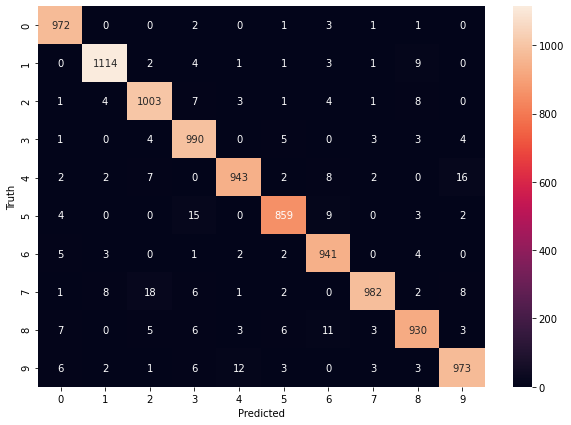

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ans 1 - Mostly the model get confused when the truth value is 4 and the output it providing was 16
and when the truth value is 9 and model is returning output as 4

# Task 3: Overfitting

In [31]:
x_train=X_train_flattened[:1000]

In [32]:
Y_train=y_train[:1000]

In [33]:
x_test=X_test_flattened

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
     keras.layers.Dense(50, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, Y_train, epochs=500)

Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 2.0239 - accuracy: 0.3860
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 1.0039 - accuracy: 0.7430
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.8890
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.9220
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9410
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1586 - accuracy: 0.9650
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1248 - accuracy: 0.9770
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9840
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9910
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9930
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 3.9759e-04 - accuracy: 1.0000
Epoch 82/500
32/32 [==============================] - 0s 3ms/step - loss: 3.8575e-04 - accuracy: 1.0000
Epoch 83/500
32/32 [==============================] - 0s 3ms/step - loss: 3.7522e-04 - accuracy: 1.0000
Epoch 84/500
32/32 [==============================] - 0s 3ms/step - loss: 3.6670e-04 - accuracy: 1.0000
Epoch 85/500
32/32 [==============================] - 0s 2ms/step - loss: 3.5684e-04 - accuracy: 1.0000
Epoch 86/500
32/32 [==============================] - 0s 3ms/step - loss: 3.4607e-04 - accuracy: 1.0000
Epoch 87/500
32/32 [==============================] - 0s 3ms/step - loss: 3.3656e-04 - accuracy: 1.0000
Epoch 88/500
32/32 [==============================] - 0s 3ms/step - loss: 3.2773e-04 - accuracy: 1.0000
Epoch 89/500
32/32 [==============================] - 0s 3ms/step - loss: 3.1901e-04 - accuracy: 1.0000
Epoch 90/500
32/32 [==============================] - 0s 2ms/step - loss: 3.1

32/32 [==============================] - 0s 3ms/step - loss: 7.0913e-05 - accuracy: 1.0000
Epoch 159/500
32/32 [==============================] - ETA: 0s - loss: 6.9777e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 6.9558e-05 - accuracy: 1.0000
Epoch 160/500
32/32 [==============================] - 0s 3ms/step - loss: 6.8298e-05 - accuracy: 1.0000
Epoch 161/500
32/32 [==============================] - 0s 3ms/step - loss: 6.7108e-05 - accuracy: 1.0000
Epoch 162/500
32/32 [==============================] - 0s 3ms/step - loss: 6.5705e-05 - accuracy: 1.0000
Epoch 163/500
32/32 [==============================] - 0s 3ms/step - loss: 6.4496e-05 - accuracy: 1.0000
Epoch 164/500
32/32 [==============================] - 0s 3ms/step - loss: 6.3189e-05 - accuracy: 1.0000
Epoch 165/500
32/32 [==============================] - 0s 2ms/step - loss: 6.2371e-05 - accuracy: 1.0000
Epoch 166/500
32/32 [==============================] - 0s 3ms/step - loss: 6.0977e-05 - accuracy: 1.0000
Epoch 167/500
32/32 [==

32/32 [==============================] - 0s 3ms/step - loss: 1.8504e-05 - accuracy: 1.0000
Epoch 236/500
32/32 [==============================] - 0s 2ms/step - loss: 1.8182e-05 - accuracy: 1.0000
Epoch 237/500
32/32 [==============================] - 0s 3ms/step - loss: 1.7935e-05 - accuracy: 1.0000
Epoch 238/500
32/32 [==============================] - 0s 3ms/step - loss: 1.7710e-05 - accuracy: 1.0000
Epoch 239/500
32/32 [==============================] - 0s 3ms/step - loss: 1.7345e-05 - accuracy: 1.0000
Epoch 240/500
32/32 [==============================] - 0s 3ms/step - loss: 1.7020e-05 - accuracy: 1.0000
Epoch 241/500
32/32 [==============================] - 0s 3ms/step - loss: 1.6777e-05 - accuracy: 1.0000
Epoch 242/500
32/32 [==============================] - 0s 3ms/step - loss: 1.6505e-05 - accuracy: 1.0000
Epoch 243/500
32/32 [==============================] - 0s 3ms/step - loss: 1.6256e-05 - accuracy: 1.0000
Epoch 244/500
32/32 [==============================] - 0s 4ms/step - 

32/32 [==============================] - 0s 3ms/step - loss: 5.6484e-06 - accuracy: 1.0000
Epoch 313/500
32/32 [==============================] - 0s 3ms/step - loss: 5.5652e-06 - accuracy: 1.0000
Epoch 314/500
32/32 [==============================] - 0s 3ms/step - loss: 5.4990e-06 - accuracy: 1.0000
Epoch 315/500
32/32 [==============================] - 0s 2ms/step - loss: 5.4298e-06 - accuracy: 1.0000
Epoch 316/500
32/32 [==============================] - 0s 2ms/step - loss: 5.3391e-06 - accuracy: 1.0000
Epoch 317/500
32/32 [==============================] - 0s 3ms/step - loss: 5.2783e-06 - accuracy: 1.0000
Epoch 318/500
32/32 [==============================] - 0s 3ms/step - loss: 5.2031e-06 - accuracy: 1.0000
Epoch 319/500
32/32 [==============================] - 0s 3ms/step - loss: 5.1159e-06 - accuracy: 1.0000
Epoch 320/500
32/32 [==============================] - 0s 3ms/step - loss: 5.0621e-06 - accuracy: 1.0000
Epoch 321/500
32/32 [==============================] - 0s 2ms/step - 

32/32 [==============================] - 0s 3ms/step - loss: 2.1715e-06 - accuracy: 1.0000
Epoch 391/500
32/32 [==============================] - 0s 3ms/step - loss: 2.1548e-06 - accuracy: 1.0000
Epoch 392/500
32/32 [==============================] - 0s 3ms/step - loss: 2.1336e-06 - accuracy: 1.0000
Epoch 393/500
32/32 [==============================] - 0s 3ms/step - loss: 2.1164e-06 - accuracy: 1.0000
Epoch 394/500
32/32 [==============================] - 0s 3ms/step - loss: 2.0933e-06 - accuracy: 1.0000
Epoch 395/500
32/32 [==============================] - 0s 2ms/step - loss: 2.0758e-06 - accuracy: 1.0000
Epoch 396/500
32/32 [==============================] - 0s 3ms/step - loss: 2.0541e-06 - accuracy: 1.0000
Epoch 397/500
32/32 [==============================] - 0s 3ms/step - loss: 2.0369e-06 - accuracy: 1.0000
Epoch 398/500
32/32 [==============================] - 0s 3ms/step - loss: 2.0224e-06 - accuracy: 1.0000
Epoch 399/500
32/32 [==============================] - 0s 3ms/step - 

32/32 [==============================] - 0s 3ms/step - loss: 1.2606e-06 - accuracy: 1.0000
Epoch 469/500
32/32 [==============================] - 0s 3ms/step - loss: 1.2560e-06 - accuracy: 1.0000
Epoch 470/500
32/32 [==============================] - 0s 3ms/step - loss: 1.2504e-06 - accuracy: 1.0000
Epoch 471/500
32/32 [==============================] - 0s 3ms/step - loss: 1.2450e-06 - accuracy: 1.0000
Epoch 472/500
32/32 [==============================] - 0s 2ms/step - loss: 1.2398e-06 - accuracy: 1.0000
Epoch 473/500
32/32 [==============================] - 0s 3ms/step - loss: 1.2357e-06 - accuracy: 1.0000
Epoch 474/500
32/32 [==============================] - 0s 3ms/step - loss: 1.2335e-06 - accuracy: 1.0000
Epoch 475/500
32/32 [==============================] - 0s 2ms/step - loss: 1.2270e-06 - accuracy: 1.0000
Epoch 476/500
32/32 [==============================] - 0s 3ms/step - loss: 1.2203e-06 - accuracy: 1.0000
Epoch 477/500
32/32 [==============================] - 0s 3ms/step - 

In [35]:
model.evaluate(X_test_flattened[1001:],y_test[1001:])

282/282 [==============================] - 1s 2ms/step - loss: 0.6067 - accuracy: 0.9034


[0.6067471504211426, 0.9034337401390076]

The accuracy of the training dataset is giving an accuracy of 100% after '500' epoch but while testing the remaining data it 
shows the accuracy of 89% with loss of 0.63, this shows the overfitting of data.

In [36]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_26 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


# Task 4 : Visualizing a neural network

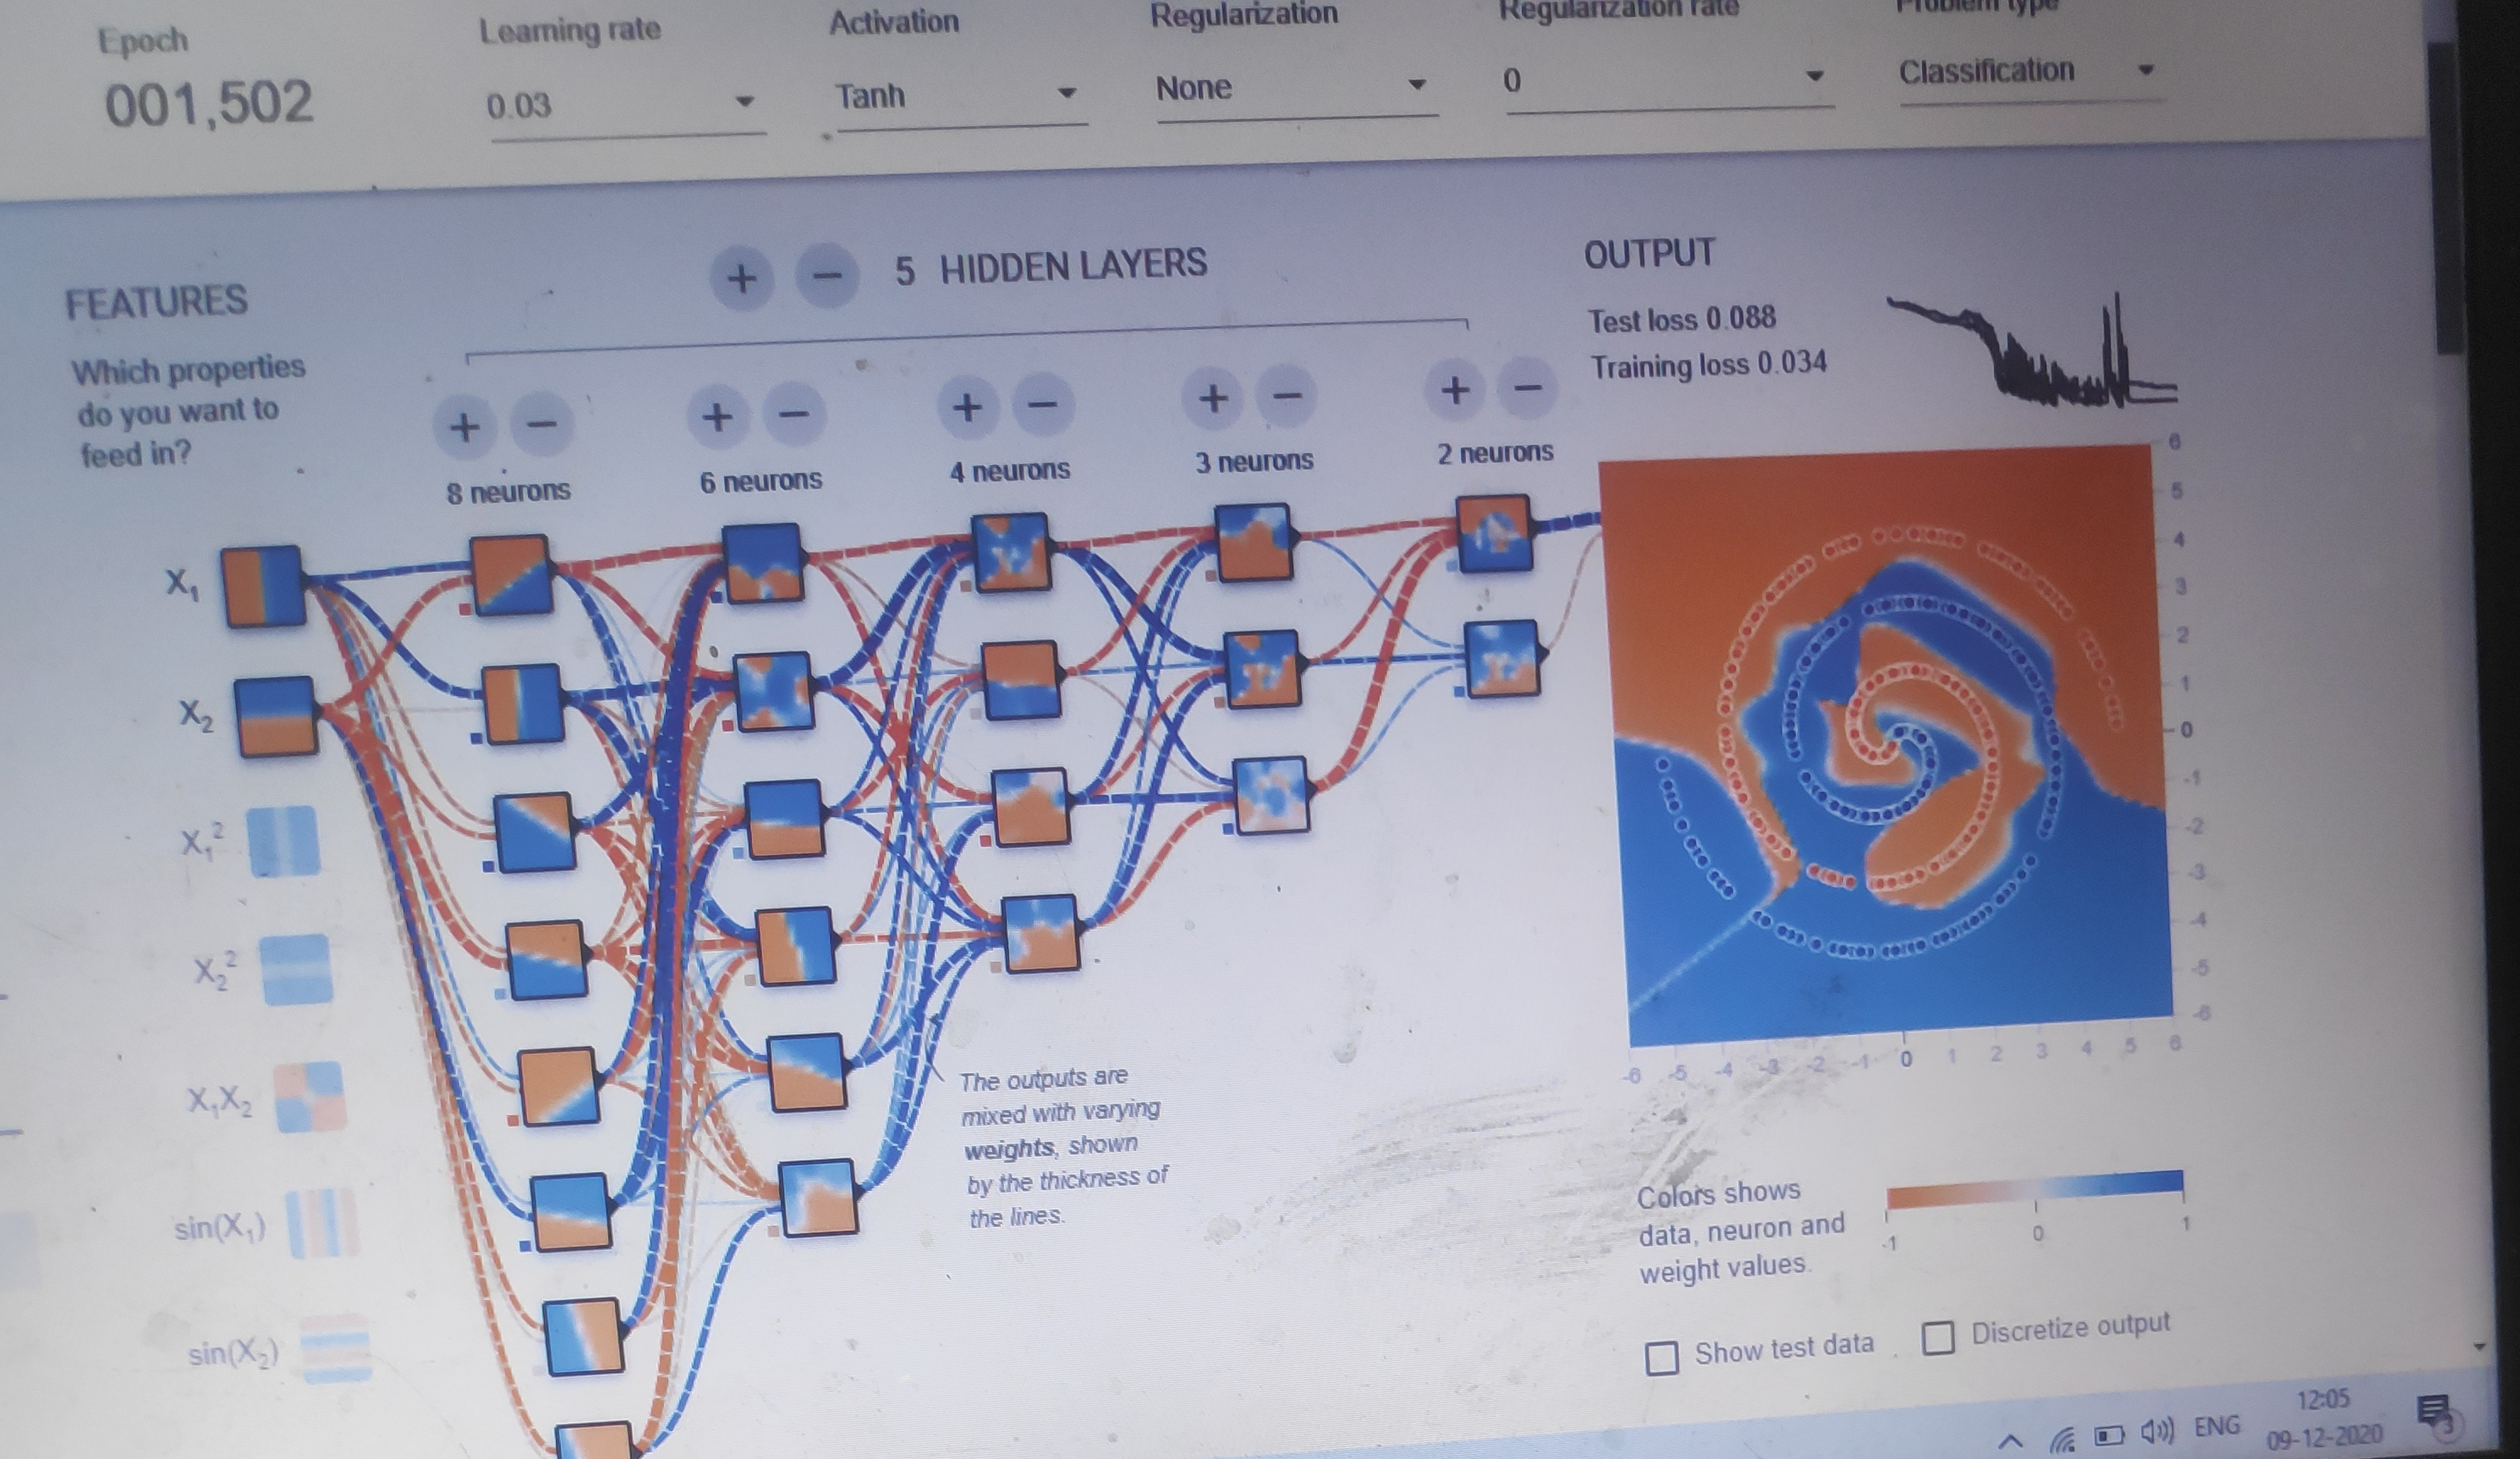

In [37]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "ab.jpg",)

with the prameters mentioned above we are able to minimise the test loss to 0.044

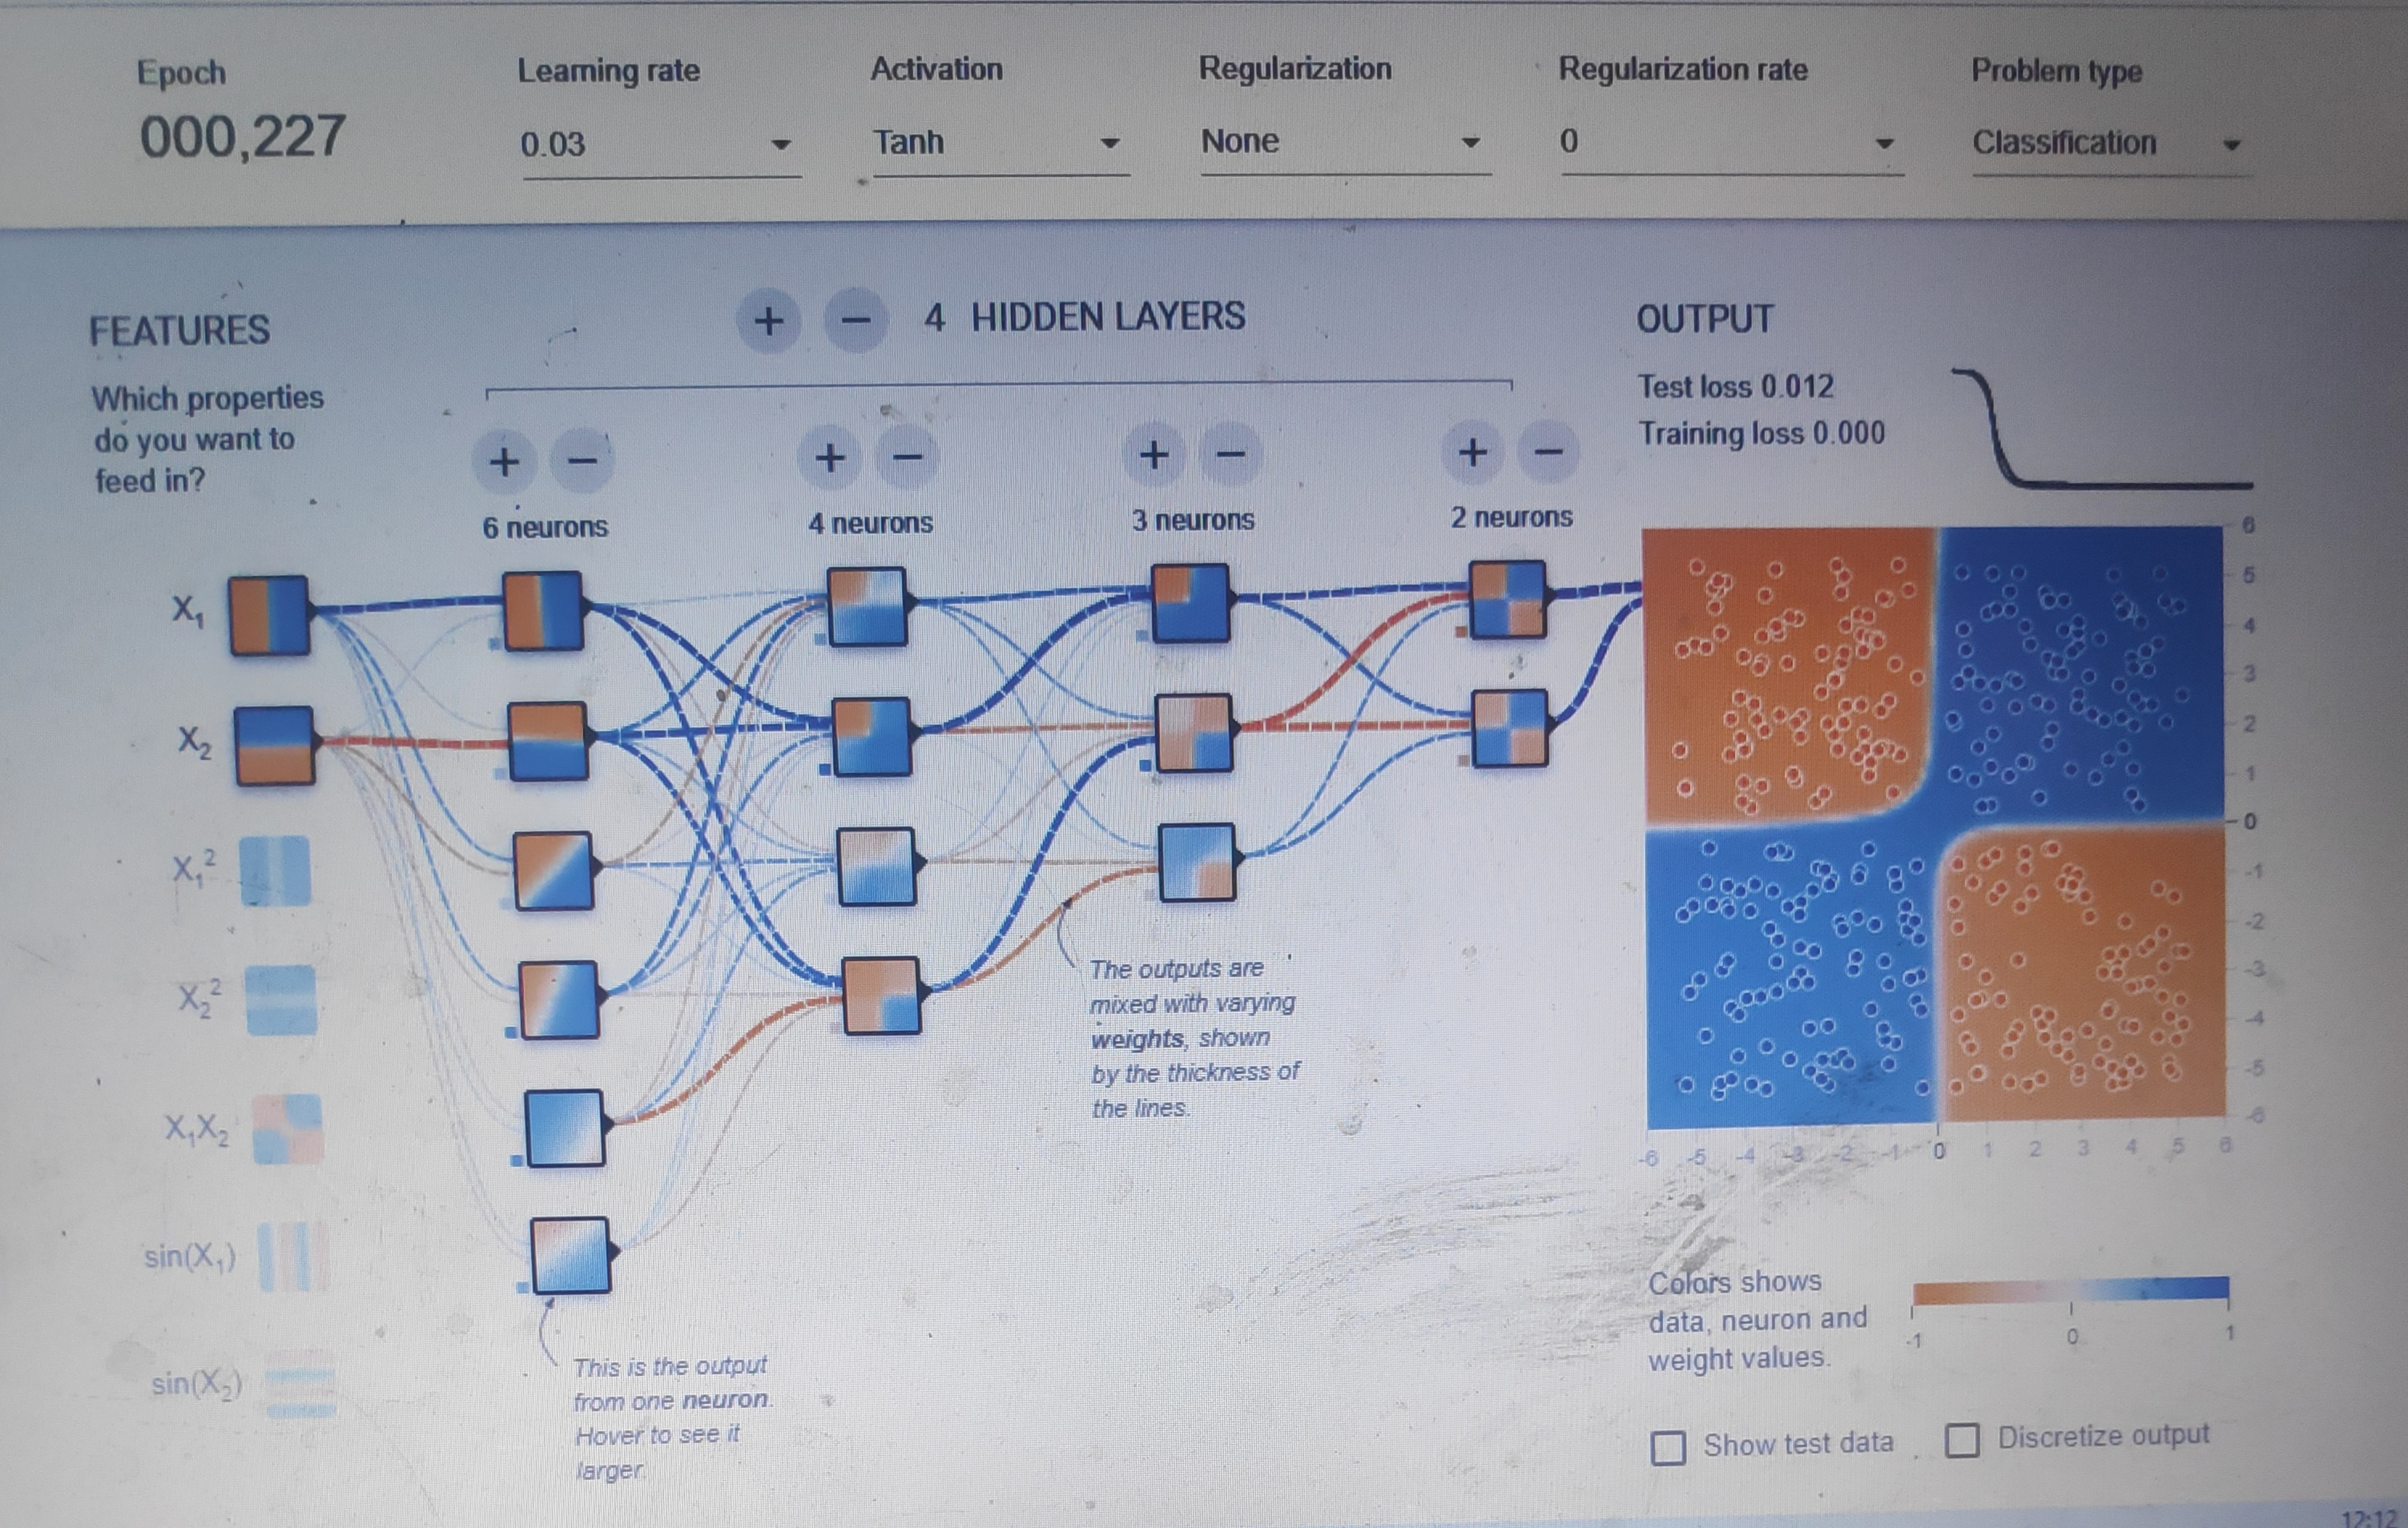

In [38]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "b1.jpg",)

# with the prameters mentioned above we are able to minimise the test loss to 0.012